In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

df_spotify = pd.read_csv("tracks_features.csv")

In [3]:
import sqlite3

cnx = sqlite3.connect("spotify.sqlite", detect_types=sqlite3.PARSE_DECLTYPES | sqlite3.PARSE_COLNAMES)
cnx.text_factory = lambda x: str(x, 'latin1')
tracks = pd.read_sql_query("SELECT * FROM tracks", cnx)
tracks

tracks2 = tracks[['id', 'popularity', 'preview_url']]

df_final = df_spotify.merge(tracks2,how='inner', on='id')
df_final

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,popularity,preview_url
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.000011,0.3560,0.5030,117.906,210133,4.0,1999,1999-11-02,67,https://p.scdn.co/mp3-preview/6981bf98c689f628...
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.000071,0.1550,0.4890,103.680,206200,4.0,1999,1999-11-02,71,https://p.scdn.co/mp3-preview/47af10b767feae26...
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.000002,0.1220,0.3700,149.749,298893,4.0,1999,1999-11-02,56,https://p.scdn.co/mp3-preview/81bf03bb51682b24...
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.000004,0.1210,0.5740,96.752,213640,4.0,1999,1999-11-02,51,https://p.scdn.co/mp3-preview/7758e1640b629c7a...
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.105000,0.0789,0.5390,127.059,205600,4.0,1999,1999-11-02,68,https://p.scdn.co/mp3-preview/58b269fc478ba0d8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352711,7FBSc3iA051IHqW3bVu8PQ,Hernan,Accidentes de Longitud y Latitud,5G3MIjx6LKu9cjLxTMR5n5,['Maneja Beto'],['0UnmV3m91hxEzspbZtoz5b'],13,1,False,0.322,...,0.203000,0.3550,0.4360,97.526,344667,3.0,2006,2006-01-01,0,https://p.scdn.co/mp3-preview/6b9c670fe351add4...
352712,6G8iIy2hXQz0RE453dQaMw,obscuridad,Accidentes de Longitud y Latitud,5G3MIjx6LKu9cjLxTMR5n5,['Maneja Beto'],['0UnmV3m91hxEzspbZtoz5b'],14,1,False,0.343,...,0.880000,0.1030,0.0933,143.404,308200,4.0,2006,2006-01-01,0,https://p.scdn.co/mp3-preview/7f386915849999f9...
352713,4pKo5WZVdZJ6J5rR8RS079,Drop the Game,Wayfairer - EP,5K45d2l5PJXVy5ESK0gKg2,['The Dartmouth Aires'],['71Cez1b1NqsxIn5u8XNiQD'],1,1,False,0.398,...,0.000000,0.0954,0.3620,76.508,193445,4.0,2016,2016-05-08,0,https://p.scdn.co/mp3-preview/143135202ad9052d...
352714,63C7ypxBOdeUSAQsoulDoO,"Medley: Bootylicious / Jumpin', Jumpin' / Say ...",Wayfairer - EP,5K45d2l5PJXVy5ESK0gKg2,['The Dartmouth Aires'],['71Cez1b1NqsxIn5u8XNiQD'],2,1,False,0.417,...,0.000000,0.0590,0.6840,81.272,262223,4.0,2016,2016-05-08,2,https://p.scdn.co/mp3-preview/e3cdd9ae8e950f8f...


In [5]:
df_final=df_final.loc[df_final['year']>1949]

In [4]:
cnx = sqlite3.connect('spotify.sqlite', detect_types=sqlite3.PARSE_DECLTYPES | sqlite3.PARSE_COLNAMES)
cnx.text_factory = lambda x: str(x, 'latin1')
artists = pd.read_sql_query("SELECT * FROM artists", cnx)
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066031 entries, 0 to 1066030
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   name        1066031 non-null  object
 1   id          1066031 non-null  object
 2   popularity  1066031 non-null  int64 
 3   followers   1066031 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.5+ MB


In [6]:
cnx = sqlite3.connect('spotify.sqlite', detect_types=sqlite3.PARSE_DECLTYPES | sqlite3.PARSE_COLNAMES)
cnx.text_factory = lambda x: str(x, 'latin1')
r_track_artist = pd.read_sql_query("SELECT * FROM r_track_artist", cnx)
r_track_artist.info()
r_track_artist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11840402 entries, 0 to 11840401
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   artist_id  object
dtypes: object(2)
memory usage: 180.7+ MB


,track_id,artist_id
0,2jKoVlU7VAmExKJ1Jh3w9P,4tujQJicOnuZRLiBFdp3Ou
1,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ
2,2jKoVlU7VAmExKJ1Jh3w9P,3iBOsmwGzRKyR0vs2I61xP
3,2jKoVlU7VAmExKJ1Jh3w9P,22qf8cJRzBjIWb2Jc4JeOr
4,4JYUDRtPZuVNi7FAnbHyux,4akj4uteQQrrGxhX9Rjuyf
...,...,...
11840397,6ClotRUApTN25L3OnkzQjb,3y9hQYlwNKqhdybIJTFzTr
11840398,7mZL8mtlavFzAzIlIfOMv2,5e8vdggiGg9glSpuBgcaiv
11840399,7mZL8mtlavFzAzIlIfOMv2,6NgwMiz1Dwsktnn8p8yujE
11840400,08ITn8qaxbnEyk3N08IC47,4NEA8zkFgdVHYWZXANEHA7


In [7]:
df_tes = df_final.merge(r_track_artist,how='inner', left_on='id', right_on='track_id')
df_tes.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,valence,tempo,duration_ms,time_signature,year,release_date,popularity,preview_url,track_id,artist_id
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.503,117.906,210133,4.0,1999,1999-11-02,67,https://p.scdn.co/mp3-preview/6981bf98c689f628...,7lmeHLHBe4nmXzuXc0HDjk,2d0hyoQ5ynDBnkvAbJKORj
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.489,103.680,206200,4.0,1999,1999-11-02,71,https://p.scdn.co/mp3-preview/47af10b767feae26...,1wsRitfRRtWyEapl0q22o8,2d0hyoQ5ynDBnkvAbJKORj
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.370,149.749,298893,4.0,1999,1999-11-02,56,https://p.scdn.co/mp3-preview/81bf03bb51682b24...,1hR0fIFK2qRG3f3RF70pb7,2d0hyoQ5ynDBnkvAbJKORj
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.574,96.752,213640,4.0,1999,1999-11-02,51,https://p.scdn.co/mp3-preview/7758e1640b629c7a...,2lbASgTSoDO7MTuLAXlTW0,2d0hyoQ5ynDBnkvAbJKORj
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.539,127.059,205600,4.0,1999,1999-11-02,68,https://p.scdn.co/mp3-preview/58b269fc478ba0d8...,1MQTmpYOZ6fcMQc56Hdo7T,2d0hyoQ5ynDBnkvAbJKORj


In [8]:
df_tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503679 entries, 0 to 503678
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                503679 non-null  object 
 1   name              503679 non-null  object 
 2   album             503679 non-null  object 
 3   album_id          503679 non-null  object 
 4   artists           503679 non-null  object 
 5   artist_ids        503679 non-null  object 
 6   track_number      503679 non-null  int64  
 7   disc_number       503679 non-null  int64  
 8   explicit          503679 non-null  bool   
 9   danceability      503679 non-null  float64
 10  energy            503679 non-null  float64
 11  key               503679 non-null  int64  
 12  loudness          503679 non-null  float64
 13  mode              503679 non-null  int64  
 14  speechiness       503679 non-null  float64
 15  acousticness      503679 non-null  float64
 16  instrumentalness  50

In [9]:
df_test = df_tes.merge(artists,how='inner', left_on='artist_id', right_on='id')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503679 entries, 0 to 503678
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              503679 non-null  object 
 1   name_x            503679 non-null  object 
 2   album             503679 non-null  object 
 3   album_id          503679 non-null  object 
 4   artists           503679 non-null  object 
 5   artist_ids        503679 non-null  object 
 6   track_number      503679 non-null  int64  
 7   disc_number       503679 non-null  int64  
 8   explicit          503679 non-null  bool   
 9   danceability      503679 non-null  float64
 10  energy            503679 non-null  float64
 11  key               503679 non-null  int64  
 12  loudness          503679 non-null  float64
 13  mode              503679 non-null  int64  
 14  speechiness       503679 non-null  float64
 15  acousticness      503679 non-null  float64
 16  instrumentalness  50

In [ ]:
#df_test=df_test.drop(columns='')

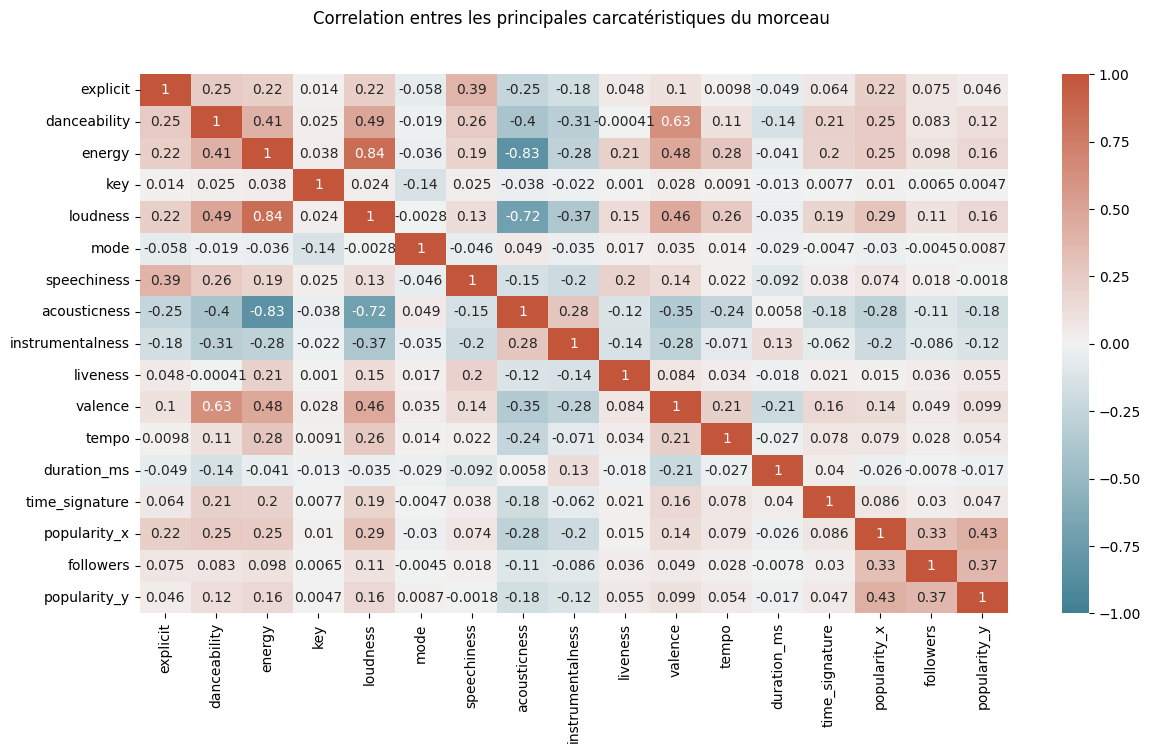

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
df_cor =df_test[['explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'popularity_x', 'followers', 'popularity_y' ]]
cmap = sns.diverging_palette(220, 20, center='light', as_cmap=True)
mat_correl = sns.heatmap(df_cor.corr(), vmin=-1, vmax=1, cmap=cmap, annot=True)
plt.title('Correlation entres les principales carcatéristiques du morceau \n \n')#vmin et vmax pour centrer les couleurs sur 0
# mat_correl.update(layout=dict(title=dict(x=0.5)))
plt.show()

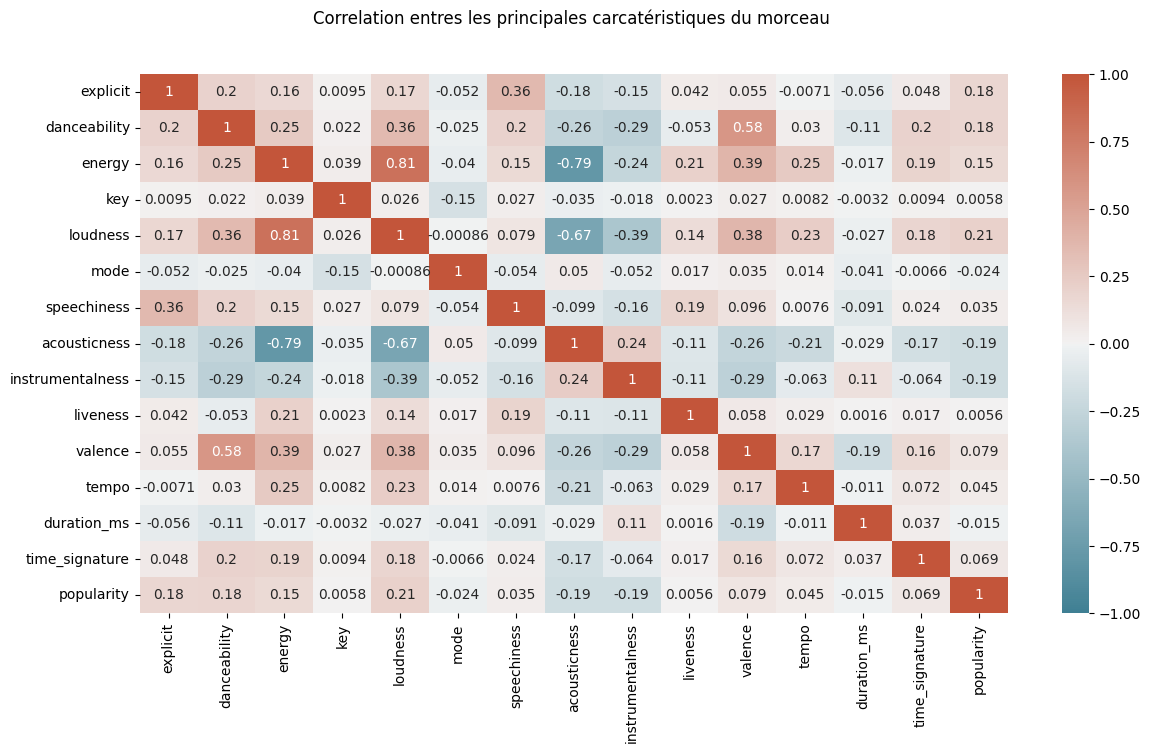

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
df_cor =df_final[['explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'popularity']]
cmap = sns.diverging_palette(220, 20, center='light', as_cmap=True)
mat_correl = sns.heatmap(df_cor.corr(), vmin=-1, vmax=1, cmap=cmap, annot=True)
plt.title('Correlation entres les principales carcatéristiques du morceau \n \n')#vmin et vmax pour centrer les couleurs sur 0
# mat_correl.update(layout=dict(title=dict(x=0.5)))
plt.show()

In [5]:
def get_decade(year):
    return str(year)[:3] + "0s"
df_final['decade'] = df_final['year'].apply(lambda x: get_decade(x))

C:\Users\Victoria\AppData\Local\Temp\ipykernel_27712\567135471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['decade'] = df_final['year'].apply(lambda x: get_decade(x))


In [6]:
musiques_per_decade = df_final.value_counts('decade')
musiques_per_decade = musiques_per_decade.to_frame().reset_index()
musiques_per_decade = musiques_per_decade.rename(columns={0: 'nombre_musiques'})
musiques_per_decade = musiques_per_decade.sort_values('decade')
musiques_per_decade

,decade,nombre_musiques
7,1950s,2479
6,1960s,5620
4,1970s,11563
3,1980s,15481
2,1990s,56015
0,2000s,126876
1,2010s,122603
5,2020s,10449


In [7]:
import plotly.express as px

fig = px.bar(musiques_per_decade, x='decade', y='nombre_musiques', 
             labels={'decade': 'Décennie', 'nombre_musiques': 'Nombre de musiques'})

fig.show()


In [8]:
# Longueur des morceaux avec le tps
lg_morceaux_tps = df_final.groupby(['decade'])['duration_ms'].mean()
lg_morceaux_tps_test = lg_morceaux_tps.to_frame().reset_index()
lg_morceaux_tps_test['duration_min'] = lg_morceaux_tps_test['duration_ms'] / 60000
lg_morceaux_tps_test

,decade,duration_ms,duration_min
0,1950s,235962.349334,3.932706
1,1960s,218894.278292,3.648238
2,1970s,248840.439159,4.147341
3,1980s,244878.102448,4.081302
4,1990s,239034.327787,3.983905
5,2000s,240079.112259,4.001319
6,2010s,248946.503903,4.149108
7,2020s,221600.875778,3.693348


In [9]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=lg_morceaux_tps_test['decade'], y=lg_morceaux_tps_test['duration_min'], mode='lines'))

fig.update_layout(title='Durée moyenne des morceaux par décennie', xaxis_title='Décennie', yaxis_title='Durée (min)')

fig.show()



In [10]:
# Longueur des morceaux avec le tps
evolution_tempo = df_final.groupby(['decade'])['tempo'].mean()

evolution_tempo = evolution_tempo.to_frame().reset_index()
evolution_tempo

,decade,tempo
0,1950s,110.485113
1,1960s,113.920605
2,1970s,118.354776
3,1980s,119.019982
4,1990s,115.868162
5,2000s,118.268546
6,2010s,118.628421
7,2020s,120.766457


In [12]:
evolution_danceability = df_final.groupby(['decade'])['danceability'].mean()

evolution_danceability = evolution_danceability.to_frame().reset_index()
evolution_danceability

,decade,danceability
0,1950s,0.437517
1,1960s,0.458725
2,1970s,0.495264
3,1980s,0.510540
4,1990s,0.491027
5,2000s,0.504227
6,2010s,0.492273
7,2020s,0.539646


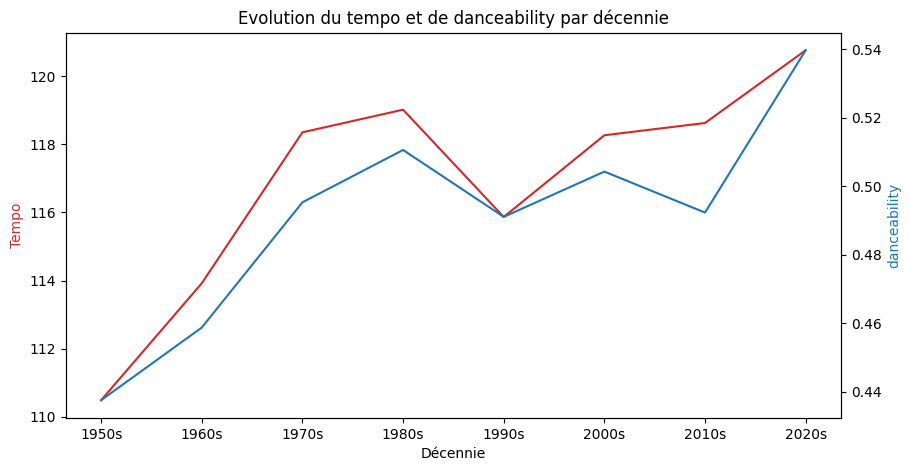

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(evolution_tempo['decade'], evolution_tempo['tempo'], color='tab:red')
ax1.set_xlabel('Décennie')
ax1.set_ylabel('Tempo', color='tab:red')

ax2 = ax1.twinx()
ax2.plot(evolution_danceability['decade'], evolution_danceability['danceability'], color='tab:blue')
ax2.set_ylabel('danceability', color='tab:blue')

plt.title('Evolution du tempo et de danceability par décennie')
plt.show()


In [14]:
# explicit
f_comptage_explicit = df_final.groupby(['explicit', 'decade']).size().reset_index(name='COUNT')
f_comptage_explicit

f_comptage_explicit = f_comptage_explicit.loc[f_comptage_explicit['explicit']==True]
f_comptage_explicit

# positivité
valence_decade = df_final.groupby(['decade'])['valence'].mean()
valence_decade
tab_valence_decade = valence_decade.to_frame().reset_index()
tab_valence_decade

,decade,valence
0,1950s,0.442224
1,1960s,0.499055
2,1970s,0.539010
3,1980s,0.515175
4,1990s,0.460359
5,2000s,0.466208
6,2010s,0.408672
7,2020s,0.401794


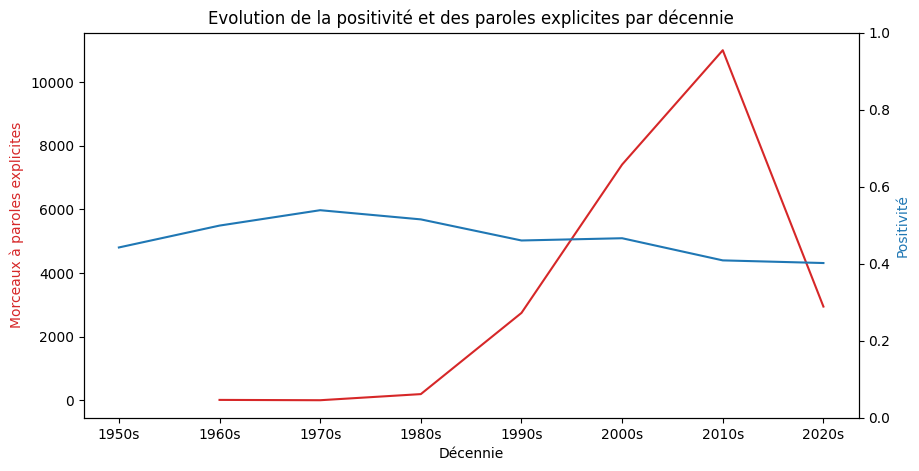

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(f_comptage_explicit['decade'], f_comptage_explicit['COUNT'], color='tab:red')
ax1.set_xlabel('Décennie')
ax1.set_ylabel('Morceaux à paroles explicites', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(tab_valence_decade['decade'], tab_valence_decade['valence'], color='tab:blue')
ax2.set_ylabel('Positivité', color='tab:blue')
ax2.set_ylim([0, 1])
plt.title('Evolution de la positivité et des paroles explicites par décennie')
plt.show()

In [16]:
key_dummies = pd.get_dummies(df_final['key'], prefix='key')

# ajouter les colonnes binaires au DataFrame original
df_final = pd.concat([df_final, key_dummies], axis=1)

In [17]:
from sklearn.neighbors import NearestNeighbors

X = df_final[['explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',	
               'acousticness', 'instrumentalness', 'liveness', 'valence','tempo',
               'key_0',	'key_1', 'key_2', 'key_3', 'key_4',	'key_5', 'key_6', 'key_7',	
               'key_8',	'key_9', 'key_10', 'key_11']]

distanceKNN = NearestNeighbors(n_neighbors=4).fit(X)

In [19]:
id_choose = int(input("Rentre l'id choisit : "))

stats = df_final.loc[id_choose, X.columns]

# Calcul des voisins les plus proches pour le point sélectionné
distances, indices = distanceKNN.kneighbors([stats])

print(indices)

[[341751  45662 231761 117415]]


c:\Users\Victoria\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



In [20]:
df_final.iloc[45662]

id                                             4EMLtIvFhu3tekFKHvD7zM
name                     Abide with Me, 'Tis Eventide (Arr. C. Gates)
album                                                   The Road Home
album_id                                       6EfDRQ3K6ocBrm5nxevWpf
artists                   ['Harrison Millard', 'BYU Combined Choirs']
artist_ids          ['4UvIoLRPFBsorgOuvs0azl', '1nS9T0R4ZxQpIAqMw7...
track_number                                                       16
disc_number                                                         1
explicit                                                        False
danceability                                                    0.123
energy                                                          0.106
key                                                                 3
loudness                                                      -25.601
mode                                                                1
speechiness         